In [1]:
pip install earthengine-api geemap


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
   ---------------------------------------- 0.0/457.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/457.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/457.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/457.2 kB ? eta -:--:--
   - -------------------------------------- 20.5/457.2 kB ? eta -:--:--
   --- ----------------------------------- 41.0/457.2 kB 393.8 kB/s eta 0:00:02
   ---- ---------------------------------- 51.2/457.2 kB 327.7 kB/s eta 0:00:02
   ------ -------------------------------- 71.7/457.2 kB 357.2 kB/s eta 0:00:02
   ------ -------------------------------- 81.9/457.2 kB 353.1 kB/s eta 0:00:02
   ------ -------------------------------- 81.9/457.2 kB 353.1 kB/s eta 0:00:02
   -------- ----------------------------- 102.4/457.2 kB 310.3 kB/s eta 0:00:

In [1]:
pip install xarray rasterio matplotlib


In [4]:
pip install rioxarray


   ---------------------------------------- 0.0/61.9 kB ? eta -:--:--
   -------------------------- ------------- 41.0/61.9 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 61.9/61.9 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.2 MB 5.0 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.2 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
   ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.6.0
    Uninstalling xarray-2023.6.0:
      Successfully uninstalled xarray-2023.6.0
Note: y

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires packaging<24,>=16.8, but you have packaging 24.2 which is incompatible.


# Checking Attributes of raster data

In [10]:
import rioxarray as rxr

# Load the raster file
file_path = "D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_aasignment\drive-download-20241207T165723Z-001\Delhi_Mean_NO2_Summer_2020.tif" # Replace with your actual file path
raster = rxr.open_rasterio(file_path)

# Check the raster structure
print(raster)

# Attributes of each pixel (bands per pixel)
print(f"Number of bands: {raster.shape[0]}")  # Shape is (bands, height, width)

# Optional: Inspect metadata for more details
print("Metadata:")
print(raster.attrs)


<xarray.DataArray (band: 1, y: 116, x: 127)>
[14732 values with dtype=float64]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 5.75e+04 5.85e+04 5.95e+04 ... 1.825e+05 1.835e+05
  * y            (y) float64 3.216e+06 3.216e+06 ... 3.102e+06 3.102e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      NO2_column_number_density
Number of bands: 1
Metadata:
{'AREA_OR_POINT': 'Area', 'scale_factor': 1.0, 'add_offset': 0.0, 'long_name': 'NO2_column_number_density'}


+ NO2_column_number_density is under the column long_name

# Cropped Raster with NaN Edges Removed

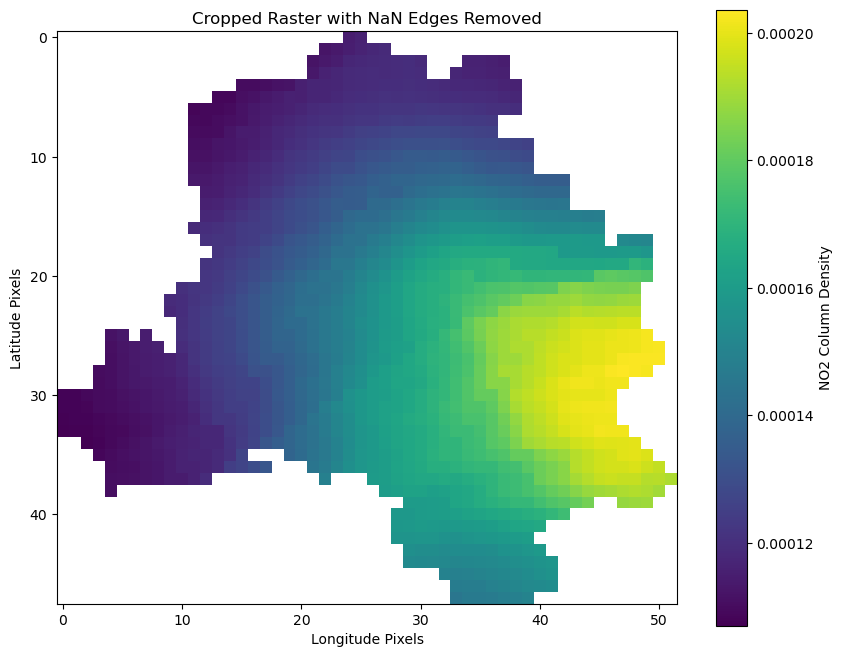

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the raster file
file_path = r"D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_aasignment\clip_tif_files_delhi\Delhi_Mean_NO2_Summer_2019.tif"  # Replace with your actual file path
raster = rxr.open_rasterio(file_path)

# Create a mask where pixels with valid data are True
valid_data_mask = ~np.isnan(raster.values.squeeze())

# Find the bounding box of valid data
valid_rows = np.any(valid_data_mask, axis=1)  # Rows with any valid data
valid_cols = np.any(valid_data_mask, axis=0)  # Columns with any valid data

# Determine the crop indices
min_row, max_row = np.where(valid_rows)[0][[0, -1]]
min_col, max_col = np.where(valid_cols)[0][[0, -1]]

# Crop the raster to the bounding box
cropped_raster = raster.isel(
    x=slice(min_col, max_col + 1),
    y=slice(min_row, max_row + 1)
)

# Plot the cropped raster
plt.figure(figsize=(10, 8))
plt.imshow(cropped_raster.values.squeeze(), cmap="viridis")
plt.colorbar(label="NO2 Column Density")
plt.title("Cropped Raster with NaN Edges Removed")
plt.xlabel("Longitude Pixels")
plt.ylabel("Latitude Pixels")
plt.show()


# Array of values in a map

In [29]:
# Extract the values from the cropped raster
cropped_values = cropped_raster.values.squeeze()

# Print the non-NaN values
valid_values = cropped_values[~np.isnan(cropped_values)]
print("NO2 Column Number Density Values (Valid Data):")
print(valid_values)

# Summary statistics
print(f"Total number of valid pixels: {len(valid_values)}")
print(f"Min value: {valid_values.min()}")
print(f"Max value: {valid_values.max()}")
print(f"Mean value: {valid_values.mean()}")


NO2 Column Number Density Values (Valid Data):
[0.00011475 0.0001162  0.00011257 ... 0.00014835 0.00014913 0.00015017]
Total number of valid pixels: 1448
Min value: 0.00010700821637580359
Max value: 0.00020368348504012882
Mean value: 0.00014811256306359742


In [22]:
pip install --upgrade xarray rioxarray


Note: you may need to restart the kernel to use updated packages.


# Clip TIFF files to Delhi region 

In [1]:
import geopandas as gpd
import glob
import os

# Define file paths
shapefile_path = r"C:\Users\JAYA PRAKASH\Downloads\Administrative Boundary Database\Delhi_shp.shp"  # Replace with your shapefile path
tiff_file_pattern = r"D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_aasignment\drive-download-20241207T165723Z-001\Delhi_Mean_NO2_Summer_*.tif"  # Adjust to your TIFF files' location
output_folder = r"D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_aasignment\clip_tif_files_delhi"  # Folder to save clipped files

# Load the shapefile
delhi_shape = gpd.read_file(shapefile_path)
print("Shapefile CRS:", delhi_shape.crs)

# Ensure shapefile CRS is WGS84 (or transform if necessary)
if delhi_shape.crs is None:
    raise ValueError("Shapefile CRS is undefined.")
delhi_shape = delhi_shape.to_crs("EPSG:4326")  # Example: Ensure it's in WGS84

# Find all TIFF files matching the pattern
tiff_files = glob.glob(tiff_file_pattern)
if not tiff_files:
    raise FileNotFoundError("No TIFF files found matching the pattern.")

# Process each TIFF file
for tiff_file in tiff_files:
    print(f"Processing: {tiff_file}")
    
    # Load the raster
    raster = rxr.open_rasterio(tiff_file)
    print("Raster CRS:", raster.rio.crs)
    
    # Reproject raster if CRS doesn't match shapefile
    if str(raster.rio.crs) != str(delhi_shape.crs):
        raster = raster.rio.reproject(delhi_shape.crs)
        print(f"Reprojected raster to match shapefile CRS: {delhi_shape.crs}")
    
    # Clip the raster using the shapefile
    clipped_raster = raster.rio.clip(delhi_shape.geometry, delhi_shape.crs)
    
    # Save the clipped raster
    output_path = os.path.join(output_folder, os.path.basename(tiff_file))
    clipped_raster.rio.to_raster(output_path)
    print(f"Clipped raster saved to: {output_path}")


Shapefile CRS: EPSG:32644
Processing: D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_aasignment\drive-download-20241207T165723Z-001\Delhi_Mean_NO2_Summer_2019.tif
Raster CRS: EPSG:32644
Reprojected raster to match shapefile CRS: EPSG:4326
Clipped raster saved to: D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_aasignment\clip_tif_files_delhi\Delhi_Mean_NO2_Summer_2019.tif
Processing: D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_aasignment\drive-download-20241207T165723Z-001\Delhi_Mean_NO2_Summer_2020.tif
Raster CRS: EPSG:32644
Reprojected raster to match shapefile CRS: EPSG:4326
Clipped raster saved to: D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_aasignment\clip_tif_files_delhi\Delhi_Mean_NO2_Summer_2020.tif
Processing: D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_aasignment\drive-download-20241207T165723Z-001\Delhi_Mean_NO2_Summer_2021.tif
Raster CRS: EPSG:32644
Reprojected raster to match shapefile CRS: EPSG:4326
Clipped raster saved to: D:\JP CERTIFICATES\IITK\Course summerter

#  Creating an Xarray dataset with mean values

In [6]:
import xarray as xr

# Define the file path pattern for the 6 clipped GeoTIFF files
file_pattern = r"D:\JP CERTIFICATES\IITK\Course summerterm\CEEW_aasignment\clip_tif_files_delhi\Delhi_Mean_NO2_Summer_*.tif"  # Replace with your actual file path

# List all GeoTIFF files matching the pattern
tiff_files = sorted(glob.glob(file_pattern))
if not tiff_files:
    raise FileNotFoundError("No GeoTIFF files found matching the pattern.")

# Extract valid data from each map and store it
all_valid_values = []
years = []  # Store the years corresponding to the maps

for tiff_file in tiff_files:
    # Load the raster
    raster = rxr.open_rasterio(tiff_file)

    # Extract valid values (non-NaN)
    cropped_values = raster.values.squeeze()
    valid_values = cropped_values[~np.isnan(cropped_values)]

    # Append the valid values for this map
    all_valid_values.append(valid_values.mean())  # Store the mean for simplicity
    # Extract the year from the filename
    year = tiff_file.split("_")[-1].split(".")[0]
    years.append(int(year))

# Create an Xarray DataArray
data = xr.DataArray(
    data=all_valid_values,  # Mean values of NO2 for each map
    dims=["time"],  # One dimension for time (years)
    coords={"time": years},  # Use the years as coordinates
    name="NO2_column_number_density"  # Name of the variable
)

# Print the Xarray DataArray
print(data)

# Save the DataArray to a NetCDF file
data.to_netcdf("Delhi_NO2_Summer_Clipped.nc")
print("Saved Xarray dataset to 'Delhi_NO2_Summer_Clipped.nc'")


<xarray.DataArray 'NO2_column_number_density' (time: 6)> Size: 48B
array([0.00014811, 0.00011521, 0.00013874, 0.00014606, 0.00014616,
       0.00014518])
Coordinates:
  * time     (time) int32 24B 2019 2020 2021 2022 2023 2024
Saved Xarray dataset to 'Delhi_NO2_Summer_Clipped.nc'


# Min Max values of NO2 of each map

In [9]:
import rioxarray as rxr
import numpy as np
import glob

# Initialize lists to store results
years = []
min_values = []
max_values = []

# Process each GeoTIFF file
for tiff_file in tiff_files:
    # Load the raster
    raster = rxr.open_rasterio(tiff_file)
    
    # Extract the year from the filename
    year = tiff_file.split("_")[-1].split(".")[0]
    years.append(int(year))
    
    # Get the raster values and exclude NaN values
    values = raster.values.squeeze()
    valid_values = values[~np.isnan(values)]
    
    # Calculate min and max values
    min_values.append(valid_values.min())
    max_values.append(valid_values.max())

# Print the results
print("Year | Min Value | Max Value")
for year, min_val, max_val in zip(years, min_values, max_values):
    print(f"{year} | {min_val:.6f} | {max_val:.6f}")


Year | Min Value | Max Value
2019 | 0.000107 | 0.000204
2020 | 0.000094 | 0.000141
2021 | 0.000106 | 0.000181
2022 | 0.000108 | 0.000200
2023 | 0.000110 | 0.000190
2024 | 0.000113 | 0.000180


# Spatial plots for each year

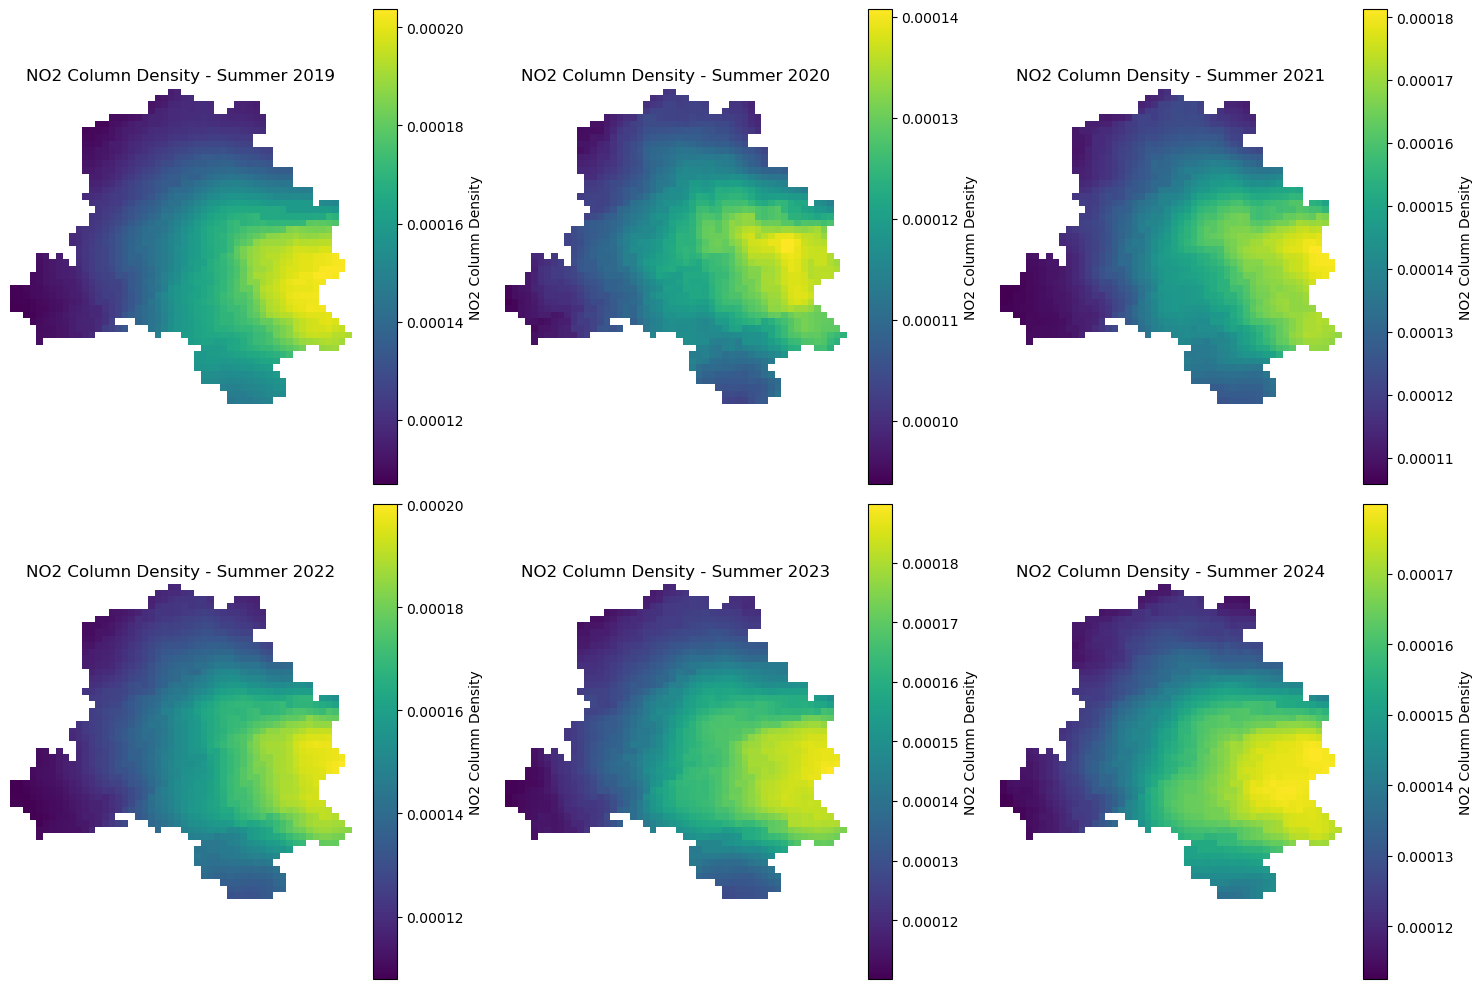

In [8]:
# Initialize a figure for plotting
plt.figure(figsize=(15, 10))

# Iterate through the TIFF files and plot each map
for i, tiff_file in enumerate(tiff_files, start=1):
    # Load the raster
    raster = rxr.open_rasterio(tiff_file)
    
    # Extract the year from the filename
    year = tiff_file.split("_")[-1].split(".")[0]
    
    # Plot the NO2 spatial distribution
    plt.subplot(2, 3, i)  # Adjust rows/columns for 6 plots
    plt.imshow(raster.squeeze(), cmap="viridis", interpolation="nearest")
    plt.colorbar(label="NO2 Column Density")
    plt.title(f"NO2 Column Density - Summer {year}")
    plt.axis("off")  # Hide axis for cleaner visualization

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


# Finding hotspots of NO2 using Thresholding technique

Year: 2019, Threshold: 0.00019094126279024657
Year: 2020, Threshold: 0.00013291765008217757
Year: 2021, Threshold: 0.00016869936543830092
Year: 2022, Threshold: 0.0001842832769940487
Year: 2023, Threshold: 0.000178955024804188
Year: 2024, Threshold: 0.00017441344409626532


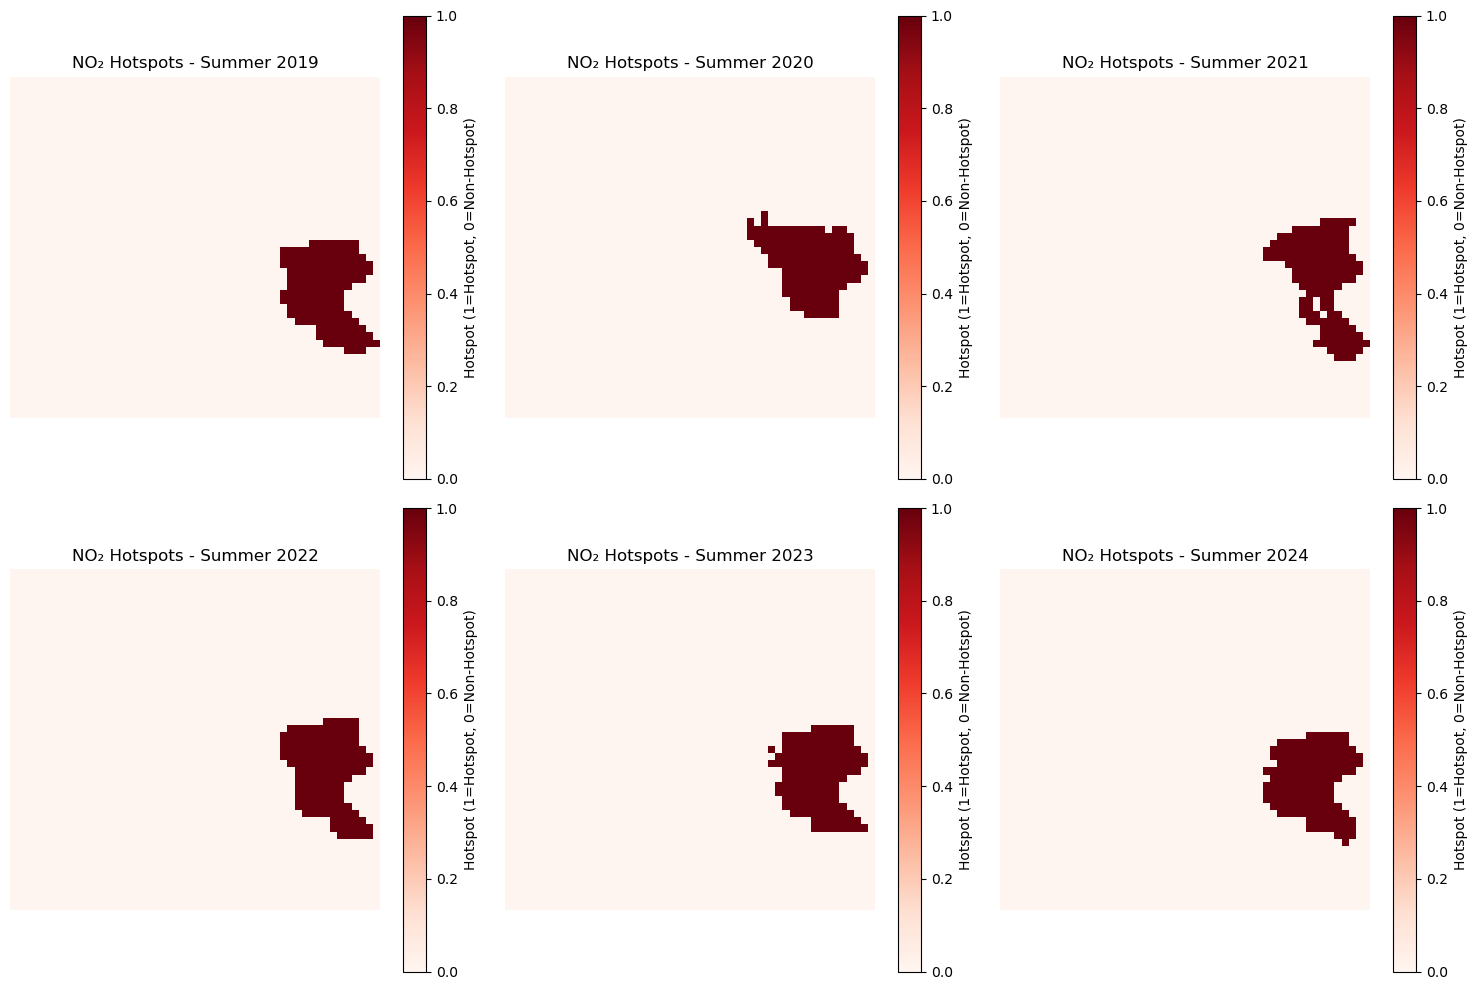

In [12]:
# Threshold for hotspots (90th percentile)
percentile_threshold = 90

# Store hotspot maps
hotspot_maps = []
years = []

# Load each TIFF file and identify hotspots
for tiff_file in tiff_files:
    # Load the raster
    raster = rxr.open_rasterio(tiff_file)
    values = raster.values.squeeze()
    
    # Compute the 90th percentile threshold for this map
    threshold = np.nanpercentile(values, percentile_threshold)
    
    # Create a binary hotspot mask
    hotspot_mask = np.where(values > threshold, 1, 0)
    hotspot_maps.append(hotspot_mask)
    
    # Extract the year from the filename
    year = tiff_file.split("_")[-1].split(".")[0]
    years.append(int(year))
    
    print(f"Year: {year}, Threshold: {threshold}")

# Visualize Hotspots for Each Year
plt.figure(figsize=(15, 10))
for i, year in enumerate(years):
    plt.subplot(2, 3, i + 1)
    plt.imshow(hotspot_maps[i], cmap="Reds", interpolation="nearest")
    plt.colorbar(label="Hotspot (1=Hotspot, 0=Non-Hotspot)")
    plt.title(f"NO₂ Hotspots - Summer {year}")
    plt.axis("off")
plt.tight_layout()
plt.show()


# Centroid of each hotspot and corresponding Lat Long values

In [15]:
from scipy.ndimage import measurements

# Threshold for hotspots (90th percentile)
percentile_threshold = 90

# Store results
hotspot_centroids = []
years = []

# Load each TIFF file and identify hotspots
for tiff_file in tiff_files:
    # Load the raster
    raster = rxr.open_rasterio(tiff_file)
    values = raster.values.squeeze()
    
    # Compute the 90th percentile threshold for this map
    threshold = np.nanpercentile(values, percentile_threshold)
    
    # Create a binary hotspot mask
    hotspot_mask = np.where(values > threshold, 1, 0)
    
    # Label connected hotspot regions
    labeled_hotspots, num_features = measurements.label(hotspot_mask)
    
    # Compute the centroid of each labeled hotspot
    centroids = measurements.center_of_mass(hotspot_mask, labeled_hotspots, range(1, num_features + 1))
    
    # Convert centroid pixel indices to lat/lon
    latitudes = raster["y"].values
    longitudes = raster["x"].values
    centroid_coords = [(latitudes[int(round(c[0]))], longitudes[int(round(c[1]))]) for c in centroids]
    
    # Store results
    hotspot_centroids.append(centroid_coords)
    
    # Extract the year from the filename
    year = tiff_file.split("_")[-1].split(".")[0]
    years.append(int(year))
    
    print(f"Year: {year}, Threshold: {threshold}, Centroids: {centroid_coords}")

# Print results
for year, centroids in zip(years, hotspot_centroids):
    print(f"Year {year}:")
    for i, (lat, lon) in enumerate(centroids, start=1):
        print(f"  Hotspot {i}: Latitude {lat}, Longitude {lon}")


Year: 2019, Threshold: 0.00019094126279024657, Centroids: [(28.580663877256892, 77.27502149647825)]
Year: 2020, Threshold: 0.00013291765008217757, Centroids: [(28.619524205667567, 77.2555913322729)]
Year: 2021, Threshold: 0.00016869936543830092, Centroids: [(28.600094041462228, 77.28473657858092)]
Year: 2022, Threshold: 0.0001842832769940487, Centroids: [(28.600094041462228, 77.27502149647825)]
Year: 2023, Threshold: 0.000178955024804188, Centroids: [(28.59037895935956, 77.27502149647825), (28.629239287770236, 77.20701592175956)]
Year: 2024, Threshold: 0.00017441344409626532, Centroids: [(28.59037895935956, 77.26530641437557)]
Year 2019:
  Hotspot 1: Latitude 28.580663877256892, Longitude 77.27502149647825
Year 2020:
  Hotspot 1: Latitude 28.619524205667567, Longitude 77.2555913322729
Year 2021:
  Hotspot 1: Latitude 28.600094041462228, Longitude 77.28473657858092
Year 2022:
  Hotspot 1: Latitude 28.600094041462228, Longitude 77.27502149647825
Year 2023:
  Hotspot 1: Latitude 28.590378

C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_1564\1494049306.py:34: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  labeled_hotspots, num_features = measurements.label(hotspot_mask)
C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_1564\1494049306.py:37: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  centroids = measurements.center_of_mass(hotspot_mask, labeled_hotspots, range(1, num_features + 1))
C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_1564\1494049306.py:34: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  labeled_hotspots, num_features = measurements.label(hotspot_mask)
C:\Users\JAYA PRAKASH\AppData\Local\Temp\ipykernel_1564\1494049306.py:37: DeprecationWarning: Please use `center_of_mass` from the `

# Percentage increase decrease of NO2 values year to year

In [16]:
# NO2 values for each year from 2019 to 2024
no2_values = [0.00014811, 0.00011521, 0.00013874, 0.00014606, 0.00014616, 0.00014518]
years = [2019, 2020, 2021, 2022, 2023, 2024]

# Calculate percentage changes
percentage_changes = []
for i in range(1, len(no2_values)):
    prev = no2_values[i - 1]
    current = no2_values[i]
    percent_change = ((current - prev) / prev) * 100
    percentage_changes.append(percent_change)

# Print the results
print("Yearly Percentage Change in NO2 Column Density:")
for i, change in enumerate(percentage_changes):
    print(f"{years[i + 1]}: {change:.2f}%")


Yearly Percentage Change in NO2 Column Density:
2020: -22.21%
2021: 20.42%
2022: 5.28%
2023: 0.07%
2024: -0.67%


2020: A significant decrease (-22.21%) due to reduced human activity, likely from lockdowns during the COVID-19 pandemic.

2021: A rebound (20.38%) as activities resumed.

2022-2024: Smaller year-over-year changes, indicating stabilization of NO₂ levels.

# Temporal maps of NO2 column number density across various scenarios. Legend shows the NO2 column number density in mol/m2

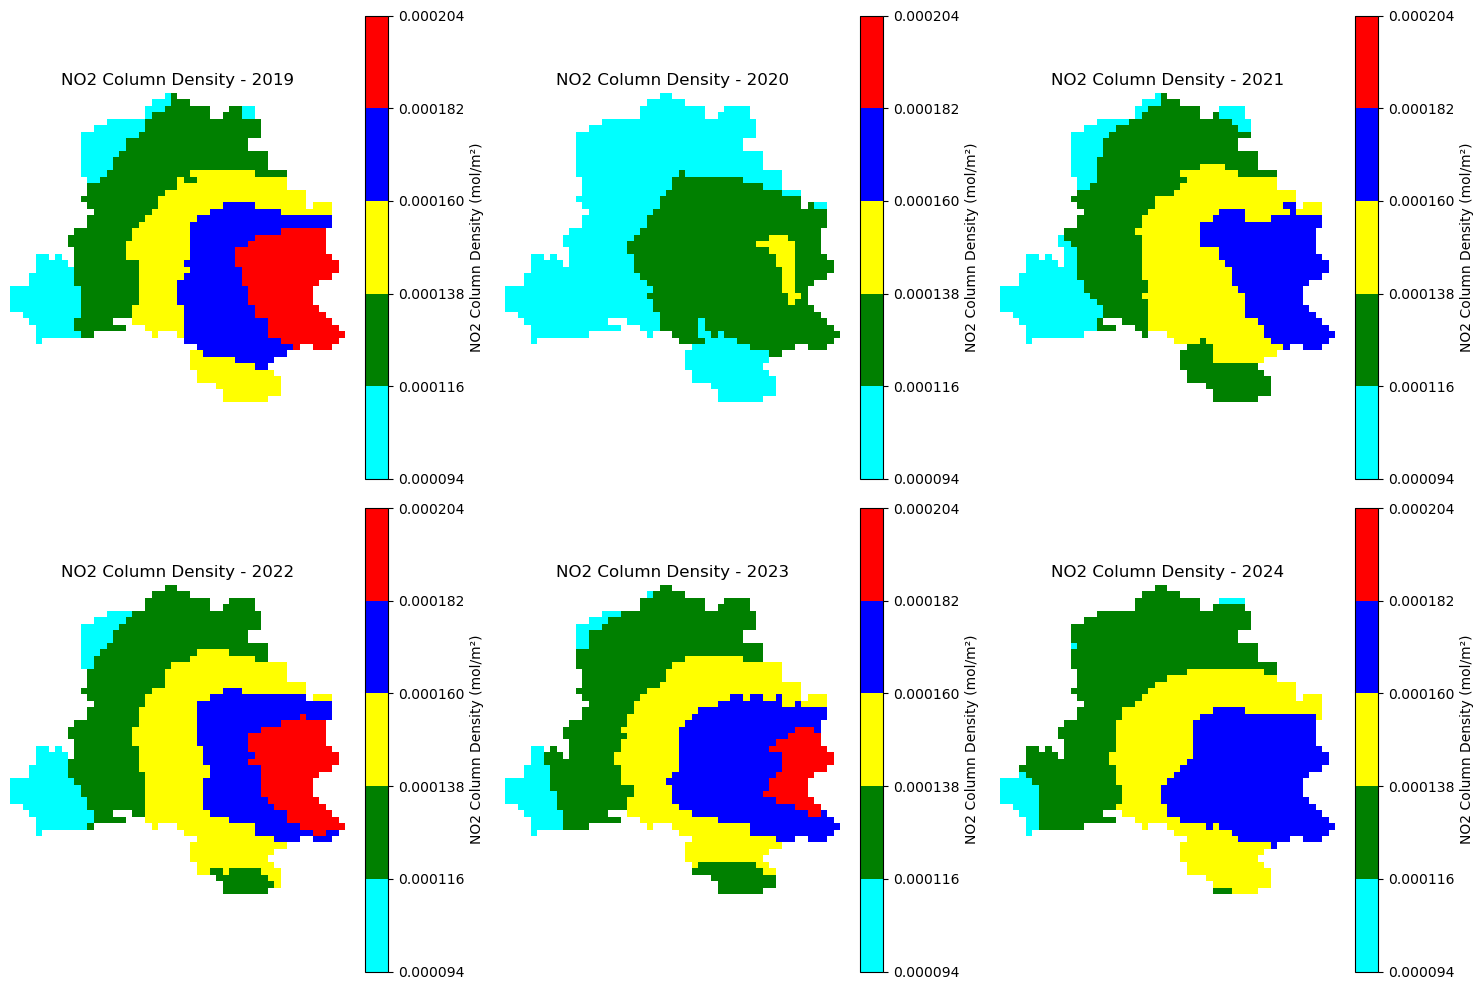

In [26]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Define a common min and max across all years
global_min = 0.000094  # Minimum across all years
global_max = 0.000204  # Maximum across all years

# Define bins for consistent scaling
bins = np.linspace(global_min, global_max, 6)  # 5 bins
colors = ["cyan", "green", "yellow", "blue", "red"]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bins, len(colors))

# Plot the maps
plt.figure(figsize=(15, 10))

for i, file in enumerate(tiff_files, start=1):
    # Load raster
    raster = rxr.open_rasterio(file)
    values = raster.values.squeeze()
    
    # Digitize raster values into bins
    binned_values = np.digitize(values, bins, right=True)
    
    # Plot the binned map
    plt.subplot(2, 3, i)
    plt.imshow(values, cmap=cmap, norm=norm)
    plt.colorbar(
        ticks=bins, 
        label="NO2 Column Density (mol/m²)"
    )
    plt.title(f"NO2 Column Density - {2019 + i - 1}")
    plt.axis("off")

# Adjust layout
plt.tight_layout()
plt.show()


## Conclusions
+ Since the scale is given same for all the plots, we get which area is mostly affected and the area which is elast affected. The area with red indication refers to NO2 affected area.
+ 2019–2024 Trends: The intensity of NO2 levels decreased significantly during the COVID-19 lockdowns (2020–2021) and gradually increased afterward.
+ 2020: A significant decrease (-22.21%) due to reduced human activity, likely from lockdowns during the COVID-19 pandemic.
+ 2021: A rebound (20.38%) as activities resumed.
+ 2022-2024: Smaller year-over-year changes, indicating stabilization of NO₂ levels.